# Comércio Ambulante na CPTM

## Análise Exploratória dos Dados

A CPTM disponibiliza (http://cptm.sp.gov.br/Transparencia/Pages/Manutencao-e-Operacao.aspx) o número de apreensões e de itens apreendidos devido à prática de comércio ambulante nos trens e estações da autarquia.

Estão disponíveis ao público os dados referentes aos anos de 2016 a 2020, em formato de planilha do *Microsoft Excel*. A partir da planilha, foi criado um arquivo *.tsv* (*tab-separeted values*). As colunas de totalização de valores por ano/linha foram removidas, permanecendo apenas os dados brutos de apreensões e itens apreendidos por ano/linha. Pequenos ajustes também foram realizados: nomes das colunas convertidos para letras minúsculas e remoção do ponto de milhar que estava presente em alguns valores.

O arquivo *comercio_ambulante.tsv* possui os seguintes campos:
* linha: linha da CPTM à qual se refere os dados (7, 8, 9, 10, 11, 12 ou 13)
* (mês) - ret: número de apreensões realizadas no mês
* (mês) - mer: número de itens apreendidos no mês

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
apreensoes = pd.read_csv('comercio_ambulante.tsv', sep = '\t')
apreensoes.head()

,linha,ano,jan - ret,jan - merc,fev - ret,fev - mer,mar - ret,mar - merc,abr - ret,abr - mer,...,ago - ret,ago - mer,set - ret,set - mer,out - ret,out - mer,nov - ret,nov - mer,dez - ret,dez - mer
0,7,2016,687.0,35438.0,828.0,27157.0,797.0,29882.0,732.0,23455.0,...,431.0,18039.0,684.0,33480.0,610.0,28177.0,574.0,25098.0,807.0,28534.0
1,8,2016,743.0,24519.0,438.0,13415.0,553.0,19798.0,754.0,26379.0,...,1444.0,52369.0,1607.0,45972.0,1716.0,46496.0,2461.0,57601.0,2144.0,44192.0
2,9,2016,343.0,11390.0,289.0,11023.0,246.0,11356.0,263.0,12141.0,...,519.0,14281.0,469.0,18768.0,969.0,24277.0,877.0,16790.0,845.0,15317.0
3,10,2016,320.0,16197.0,362.0,13945.0,338.0,15352.0,227.0,7991.0,...,226.0,10693.0,137.0,6336.0,96.0,3614.0,140.0,5623.0,172.0,6167.0
4,11,2016,664.0,25531.0,605.0,19695.0,417.0,14198.0,566.0,20302.0,...,693.0,31927.0,821.0,31903.0,768.0,29538.0,703.0,20413.0,744.0,21239.0


In [3]:
apreensoes.shape

(33, 26)

In [4]:
apreensoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   linha       33 non-null     int64  
 1   ano         33 non-null     int64  
 2   jan - ret   32 non-null     float64
 3   jan - merc  32 non-null     float64
 4   fev - ret   25 non-null     float64
 5   fev - mer   25 non-null     float64
 6   mar - ret   25 non-null     float64
 7   mar - merc  25 non-null     float64
 8   abr - ret   25 non-null     float64
 9   abr - mer   25 non-null     float64
 10  mai - ret   25 non-null     float64
 11  mai - mer   25 non-null     float64
 12  jun - ret   25 non-null     float64
 13  jun - mer   25 non-null     float64
 14  jul - ret   26 non-null     float64
 15  jul - mer   26 non-null     float64
 16  ago - ret   26 non-null     float64
 17  ago - mer   26 non-null     float64
 18  set - ret   26 non-null     float64
 19  set - mer   26 non-null     flo

In [5]:
#os valores não informados não serão substituídos por 0 para que não afetem as médias mensais e anuais.
#Não há dados para a Linha 13 anteriores a julho de 2018 (inaugurada em março do mesmo ano)
#Os dados disponíveis para 2020 são referentes ao mês de janeiro.
apreensoes.isnull().sum()

linha         0
ano           0
jan - ret     1
jan - merc    1
fev - ret     8
fev - mer     8
mar - ret     8
mar - merc    8
abr - ret     8
abr - mer     8
mai - ret     8
mai - mer     8
jun - ret     8
jun - mer     8
jul - ret     7
jul - mer     7
ago - ret     7
ago - mer     7
set - ret     7
set - mer     7
out - ret     7
out - mer     7
nov - ret     7
nov - mer     7
dez - ret     7
dez - mer     7
dtype: int64

In [6]:
apreensoes.describe()

,linha,ano,jan - ret,jan - merc,fev - ret,fev - mer,mar - ret,mar - merc,abr - ret,abr - mer,...,ago - ret,ago - mer,set - ret,set - mer,out - ret,out - mer,nov - ret,nov - mer,dez - ret,dez - mer
count,33.000000,33.000000,32.000000,32.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,9.818182,2018.090909,789.781250,25374.781250,692.400000,23663.160000,722.120000,27704.640000,692.760000,24282.000000,...,880.461538,31944.884615,719.923077,24482.653846,698.692308,24714.269231,788.076923,25816.038462,738.076923,22598.038462
std,1.943813,1.422226,521.536918,15254.858783,469.345733,15980.420803,461.784881,16493.032486,460.225785,14712.855235,...,608.472923,18598.559814,446.066535,14639.800168,466.201567,14451.578653,626.400698,16997.688030,554.916637,14548.498082
min,7.000000,2016.000000,71.000000,1848.000000,52.000000,1884.000000,51.000000,2101.000000,43.000000,2030.000000,...,58.000000,1815.000000,44.000000,1490.000000,48.000000,2831.000000,53.000000,1345.000000,61.000000,2191.000000
25%,8.000000,2017.000000,403.750000,13858.750000,480.000000,13415.000000,417.000000,14598.000000,426.000000,12683.000000,...,512.250000,19274.000000,468.250000,17466.250000,416.000000,14018.750000,426.250000,15325.500000,279.250000,12399.750000
50%,10.000000,2018.000000,675.500000,25204.000000,606.000000,19695.000000,684.000000,23873.000000,611.000000,23455.000000,...,811.500000,32013.000000,711.000000,24006.500000,614.000000,23032.000000,699.500000,23183.500000,715.500000,21898.000000
75%,11.000000,2019.000000,1150.500000,35494.250000,828.000000,27157.000000,797.000000,40509.000000,815.000000,27383.000000,...,1068.000000,42315.000000,1004.250000,33085.750000,970.500000,34399.000000,1080.000000,35235.000000,1028.750000,29070.000000
max,13.000000,2020.000000,2007.000000,68669.000000,2294.000000,77317.000000,2016.000000,61379.000000,1850.000000,66949.000000,...,2655.000000,77662.000000,1607.000000,60402.000000,1716.000000,50008.000000,2461.000000,61888.000000,2144.000000,51869.000000


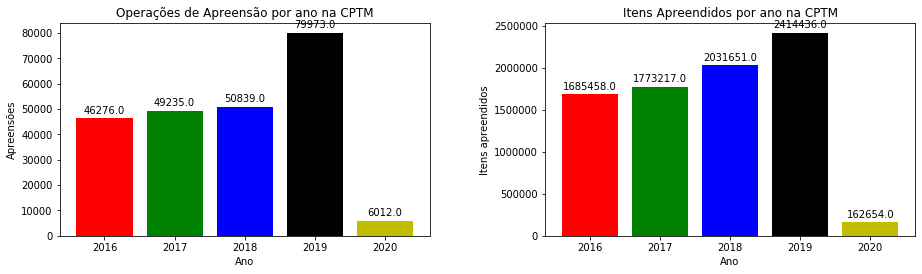

,ano,apreensoes,itens_apreendidos
0,2016,46276.0,1685458.0
1,2017,49235.0,1773217.0
2,2018,50839.0,2031651.0
3,2019,79973.0,2414436.0
4,2020,6012.0,162654.0


In [7]:
#número de apreensões e de itens aprrendidos por ano na CPTM
#qual o ano/mês com o maior número de apreensões/itens apreendidos no período?
cores = list('rgbkymc')

def show_label(ax, container):
    for c in container:
        height = c.get_height()
        
        ax.annotate('{}'.format(height),
                    xy = (c.get_x() + c.get_width() / 2, height),
                    xytext = (0, 3),  #3 points vertical offset
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

def apreensoes_ano(linha = None):
    colunas = apreensoes.columns
    agregar = {colunas[i] : 'sum' for i in range(2, 26)}
    
    if(linha == None):
        dados = apreensoes.groupby('ano').agg(agregar)
    else:
        dados = apreensoes[apreensoes.linha == linha].groupby('ano').agg(agregar)
    
    col_apree = [c for c in apreensoes.columns if 'ret' in c]
    col_itens = [c for c in apreensoes.columns if 'mer' in c]
    
    apreensoes_ano = dados[col_apree].sum(axis = 1)
    itens_ano = dados[col_itens].sum(axis = 1)
    
    dados = pd.DataFrame(apreensoes_ano).merge(pd.DataFrame(itens_ano), on = 'ano').reset_index()
    dados.columns = ['ano', 'apreensoes', 'itens_apreendidos']
        
    fig, ax = plt.subplots(figsize = (14, 5), nrows = 1, ncols = 2)
    titulo = 'na CPTM' if linha == None else 'na Linha ' + str(linha) + ' da CPTM'
    
    bar_apree = ax[0].bar(dados.ano, dados.apreensoes, color = cores, label = 'Apreensões')
    ax[0].set_title(f'Operações de Apreensão por ano {titulo}')
    ax[0].set_xlabel('Ano')
    ax[0].set_ylabel('Apreensões')
    ax[0].set_xticks(dados.ano.unique())
    show_label(ax[0], bar_apree)
    
    bar_itens = ax[1].bar(dados.ano, dados.itens_apreendidos, color = cores, label = 'Itens Apreendidos')
    ax[1].set_xlabel('Ano')
    ax[1].set_title(f'Itens Apreendidos por ano {titulo}')
    ax[1].set_ylabel('Itens apreendidos')
    ax[1].set_xticks(dados.ano.unique())
    show_label(ax[1], bar_itens)
    
    plt.tight_layout(pad = 5)
    plt.show()
    
    return dados

apreensoes_ano()

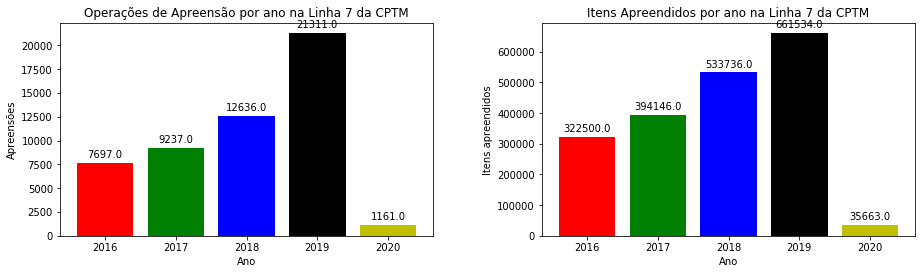

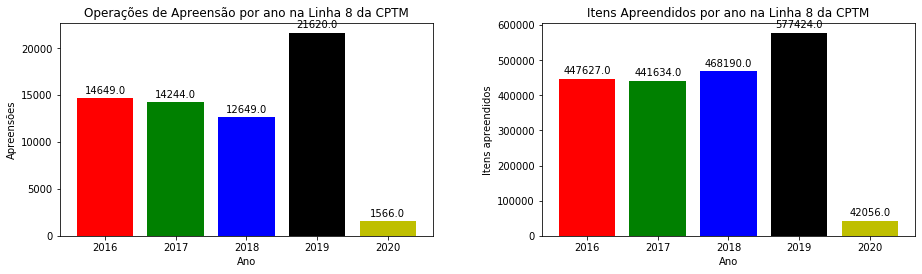

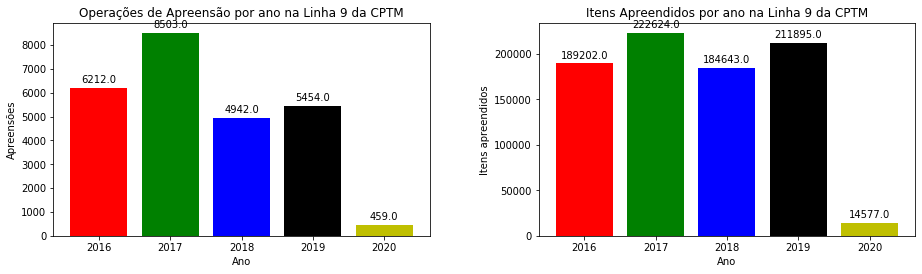

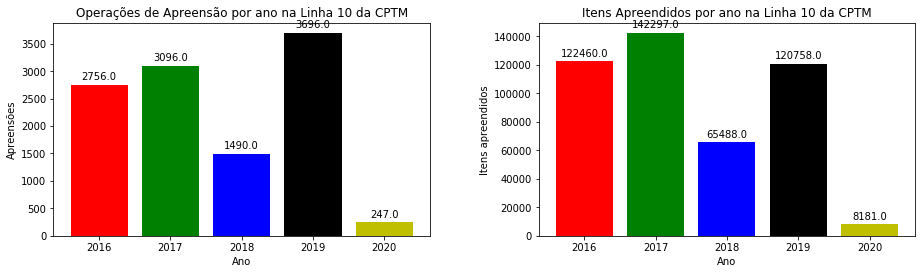

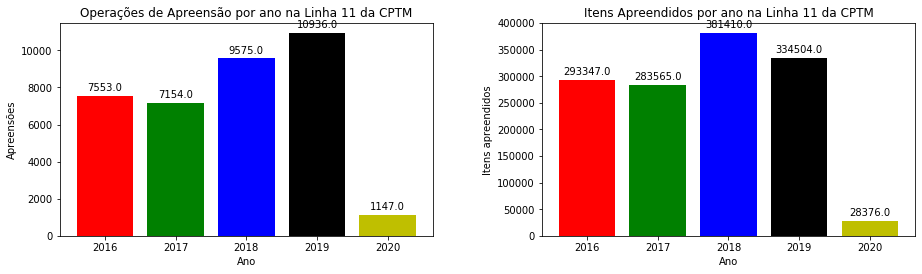

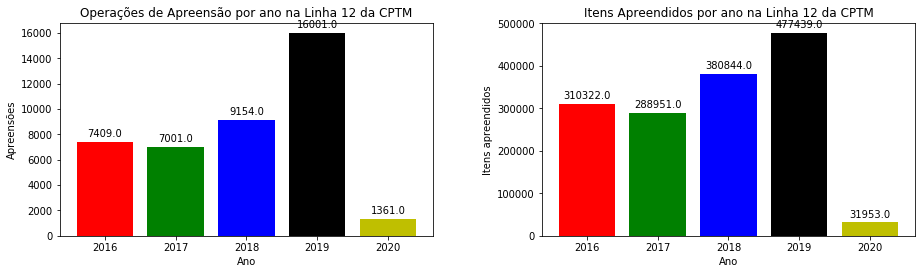

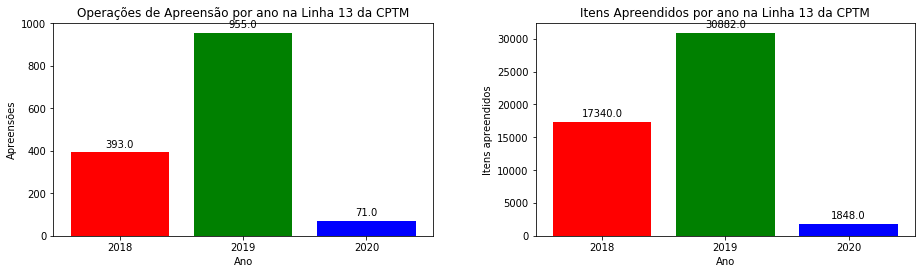

In [8]:
for l in apreensoes.linha.unique():
    apreensoes_ano(l)

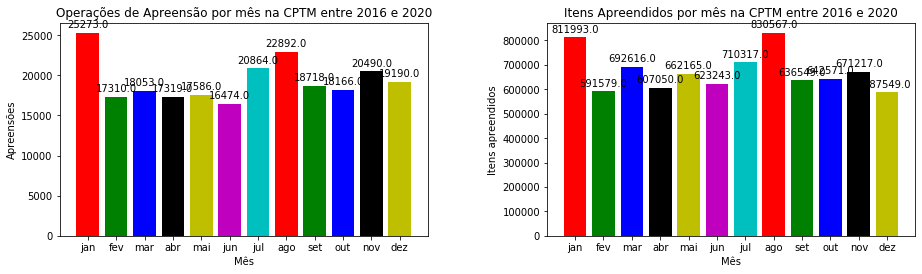

,mes,apreensoes,itens_apreendidos
0,jan,25273.0,811993.0
1,fev,17310.0,591579.0
2,mar,18053.0,692616.0
3,abr,17319.0,607050.0
4,mai,17586.0,662165.0
5,jun,16474.0,623243.0
6,jul,20864.0,710317.0
7,ago,22892.0,830567.0
8,set,18718.0,636549.0
9,out,18166.0,642571.0


In [9]:
#número de apreensões e de itens aprrendidos por mês na CPTM
def apreensoes_mes(linha = None):    
    if(linha == None):
        dados = apreensoes.copy()
    else:
        dados = apreensoes[apreensoes.linha == linha]
    
    meses = []
    
    for item in pd.Series([c for c in apreensoes.columns if 'ret' in c]).str.split(' - '):
        meses.append(item[0])
        
    dict = []
    
    for m in meses:
        cols = [c for c in apreensoes.columns if m in c]
        dict.append({'mes' : m, 'apreensoes' : dados[cols[0]].sum(), 'itens_apreendidos' : dados[cols[1]].sum()})
    
    dados = pd.DataFrame(dict)
            
    fig, ax = plt.subplots(figsize = (14, 5), nrows = 1, ncols = 2)
    titulo = 'na CPTM' if linha == None else 'na Linha ' + str(linha) + ' da CPTM'
    anos = apreensoes.ano.unique()
    
    bar_apree = ax[0].bar(dados.mes, dados.apreensoes, color = cores, label = 'Apreensões')
    ax[0].set_title(f'Operações de Apreensão por mês {titulo} entre {min(anos)} e {max(anos)}')
    ax[0].set_xlabel('Mês')
    ax[0].set_ylabel('Apreensões')
    ax[0].set_xticks(dados.mes.unique())
    show_label(ax[0], bar_apree)
    
    bar_itens = ax[1].bar(dados.mes, dados.itens_apreendidos, color = cores, label = 'Itens Apreendidos')
    ax[1].set_xlabel('Mês')
    ax[1].set_title(f'Itens Apreendidos por mês {titulo} entre {min(anos)} e {max(anos)}')
    ax[1].set_ylabel('Itens apreendidos')
    ax[1].set_xticks(dados.mes.unique())
    show_label(ax[1], bar_itens)
    
    plt.tight_layout(pad = 5)
    plt.show()
    
    return dados

apreensoes_mes()

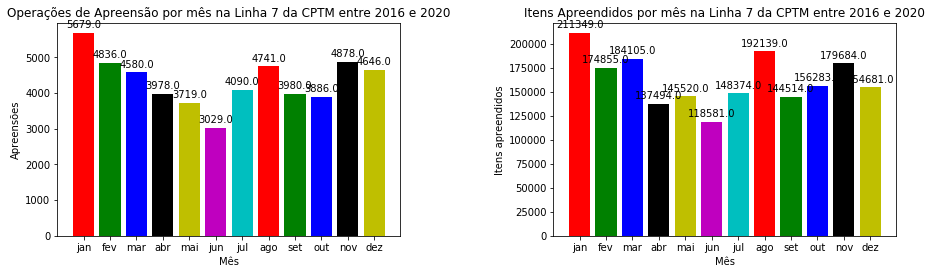

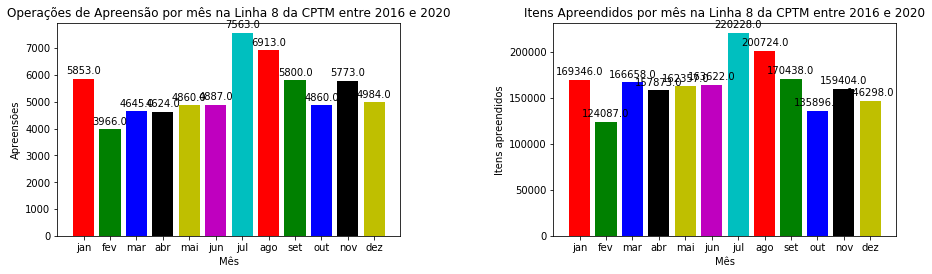

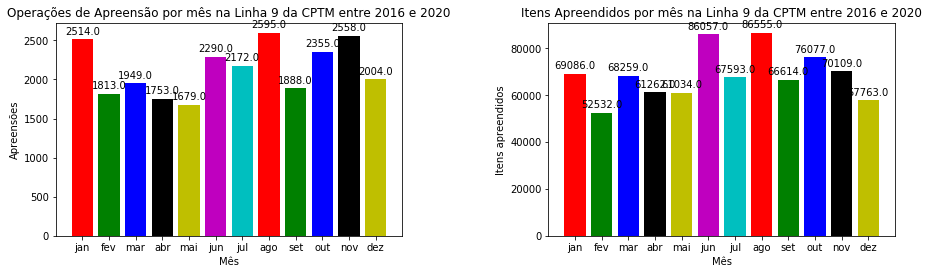

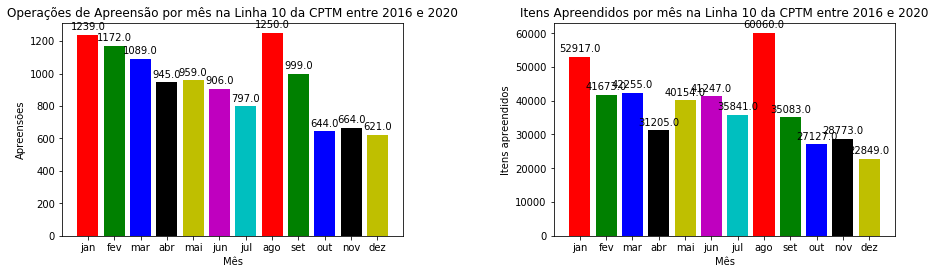

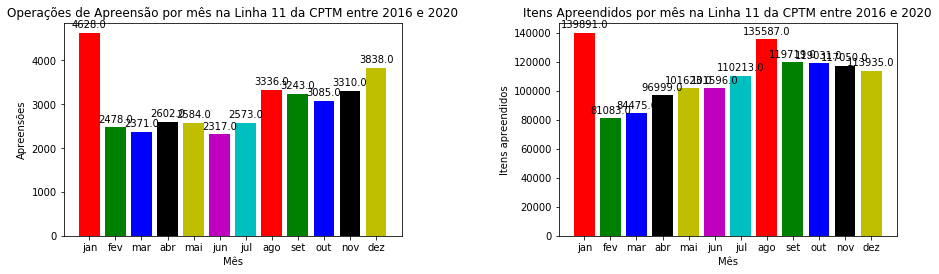

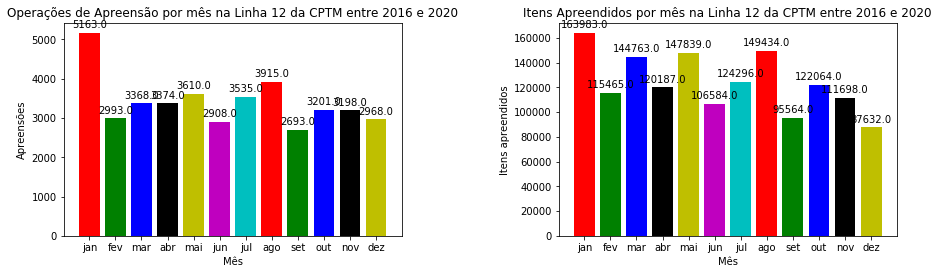

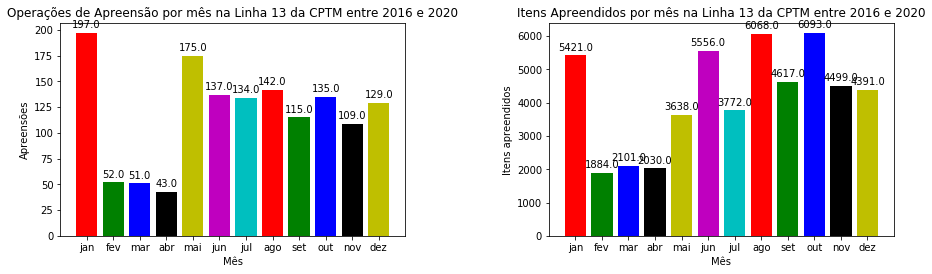

In [10]:
for l in apreensoes.linha.unique():
    apreensoes_mes(l)

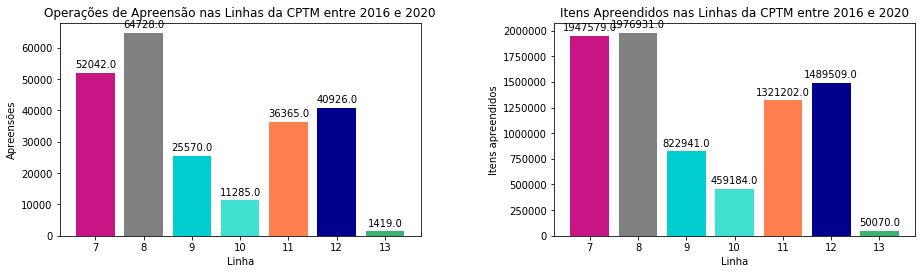

,linha,apreensoes,itens_apreendidos
0,7,52042.0,1947579.0
1,8,64728.0,1976931.0
2,9,25570.0,822941.0
3,10,11285.0,459184.0
4,11,36365.0,1321202.0
5,12,40926.0,1489509.0
6,13,1419.0,50070.0


In [11]:
#participação de cada linha no total de apreensões/itens apreendidos no período disponível
def apreensoes_linha():
    colunas = apreensoes.columns
    agregar = {colunas[i] : 'sum' for i in range(2, 26)}
    
    dados = apreensoes.groupby('linha').agg(agregar)
    
    col_apree = [c for c in apreensoes.columns if 'ret' in c]
    col_itens = [c for c in apreensoes.columns if 'mer' in c]
    
    apreensoes_ano = dados[col_apree].sum(axis = 1)
    itens_ano = dados[col_itens].sum(axis = 1)
    
    dados = pd.DataFrame(apreensoes_ano).merge(pd.DataFrame(itens_ano), on = 'linha').reset_index()
    dados.columns = ['linha', 'apreensoes', 'itens_apreendidos']
        
    fig, ax = plt.subplots(figsize = (14, 5), nrows = 1, ncols = 2)
    anos = apreensoes.ano.unique()
    cores = ['mediumvioletred', 'gray', 'darkturquoise', 'turquoise', 'coral', 'darkblue', 'mediumseagreen']
    
    bar_apree = ax[0].bar(dados.linha, dados.apreensoes, color = cores, label = 'Apreensões')
    ax[0].set_title(f'Operações de Apreensão nas Linhas da CPTM entre {min(anos)} e {max(anos)}')
    ax[0].set_xlabel('Linha')
    ax[0].set_ylabel('Apreensões')
    show_label(ax[0], bar_apree)
    
    bar_itens = ax[1].bar(dados.linha, dados.itens_apreendidos, color = cores, label = 'Itens Apreendidos')
    ax[1].set_xlabel('Linha')
    ax[1].set_title(f'Itens Apreendidos nas Linhas da CPTM entre {min(anos)} e {max(anos)}')
    ax[1].set_ylabel('Itens apreendidos')
    show_label(ax[1], bar_itens)
    
    plt.tight_layout(pad = 5)
    plt.show()
    
    return dados

apreensoes_linha()

## Estimando o número de apreensões/itens apreendidos no futuro

Regressão Linear: Apreensões
Interceptação: [-20662135.5]
Coeficientes: [[10269.5]]


Regressão Linear: Itens Apreendidos
Interceptação: [-4.91376804e+08]
Coeficientes: [[244536.8]]


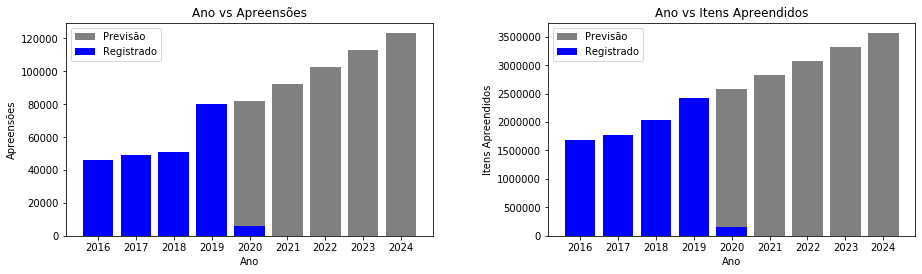

,ano,apreensoes,itens_apreendidos,tipo
0,2016,46276.0,1685458.0,registrado
1,2017,49235.0,1773217.0,registrado
2,2018,50839.0,2031651.0,registrado
3,2019,79973.0,2414436.0,registrado
4,2020,6012.0,162654.0,registrado
5,2020,82254.5,2587532.5,previsão
6,2021,92524.0,2832069.3,previsão
7,2022,102793.5,3076606.1,previsão
8,2023,113063.0,3321142.9,previsão
9,2024,123332.5,3565679.7,previsão


In [12]:
colunas = apreensoes.columns
agregar = {colunas[i] : 'sum' for i in range(2, 26)}

dados = apreensoes.groupby('ano').agg(agregar)

col_apree = [c for c in apreensoes.columns if 'ret' in c]
col_itens = [c for c in apreensoes.columns if 'mer' in c]

apreensoes_ano = dados[col_apree].sum(axis = 1)
itens_ano = dados[col_itens].sum(axis = 1)

dados = pd.DataFrame(apreensoes_ano).merge(pd.DataFrame(itens_ano), on = 'ano').reset_index()
dados.columns = ['ano', 'apreensoes', 'itens_apreendidos']

treino_x = dados.loc[:3, 'ano'].values.reshape(-1,1)
treino_y = dados.loc[:3, 'apreensoes'].values.reshape(-1,1)

regressao = LinearRegression(n_jobs = -1)

regressao.fit(treino_x, treino_y)
previsao_apree = regressao.predict([[2020], [2021], [2022], [2023], [2024]])

print(f'Regressão Linear: Apreensões\n'
      f'Interceptação: {regressao.intercept_}\n' +
      f'Coeficientes: {regressao.coef_}')

treino_y = dados.loc[:3, 'itens_apreendidos'].values.reshape(-1,1)

regressao.fit(treino_x, treino_y)
previsao_itens = regressao.predict([[2020], [2021], [2022], [2023], [2024]])

print(f'\n\nRegressão Linear: Itens Apreendidos\n'
      f'Interceptação: {regressao.intercept_}\n' +
      f'Coeficientes: {regressao.coef_}')

ano = 2020
dict = []

for i in range(len(previsao_apree)):
    dict.append({'ano' : ano, 'apreensoes' : previsao_apree[i, 0], 'itens_apreendidos' : previsao_itens[i, 0]})
    ano += 1
    
dados2 = pd.DataFrame(dict)
dados = dados.append(dados2, ignore_index = True)

dados.loc[:4, 'tipo'] = 'registrado'
dados.loc[5:, 'tipo'] = 'previsão'

fig, ax = plt.subplots(figsize = (14, 5), nrows = 1, ncols = 2)

bar_apree_p = ax[0].bar(dados.loc[5:, 'ano'], dados.loc[5:, 'apreensoes'], color = 'gray', label = 'Previsão')
bar_apree_r = ax[0].bar(dados.loc[:4, 'ano'], dados.loc[:4, 'apreensoes'], color = 'b', label = 'Registrado')  
ax[0].set_title('Ano vs Apreensões')  
ax[0].set_xlabel('Ano')  
ax[0].set_ylabel('Apreensões')
ax[0].set_xticks(dados.ano.unique())
ax[0].legend()

bar_itens_p = ax[1].bar(dados.loc[5:, 'ano'], dados.loc[5:, 'itens_apreendidos'], color = 'gray', label = 'Previsão')
bar_itens_r = ax[1].bar(dados.loc[:4, 'ano'], dados.loc[:4, 'itens_apreendidos'], color = 'b', label = 'Registrado')  
ax[1].set_title('Ano vs Itens Apreendidos')  
ax[1].set_xlabel('Ano')  
ax[1].set_ylabel('Itens Apreendidos')
ax[1].set_xticks(dados.ano.unique())
ax[1].legend()

plt.tight_layout(pad = 5)
plt.show()

dados